In [29]:
!pip install scikit-learn

In [30]:
!pip install --upgrade pip

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("C:/Users/shubh/Downloads/emails.csv")
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [33]:
X=df['text'].astype(str)
y=df['spam'].replace({0:"Ham",1:"Spam"}).astype("object")

In [34]:
y

0       Spam
1       Spam
2       Spam
3       Spam
4       Spam
        ... 
5723     Ham
5724     Ham
5725     Ham
5726     Ham
5727     Ham
Name: spam, Length: 5728, dtype: object

In [28]:
df.isnull().value_counts()

text   spam 
False  False    5728
Name: count, dtype: int64

In [35]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: * special notification * aurora versi...    2
1     1368   1368  Subject: naturally irresistible your corporate...    1

In [36]:
from sklearn.model_selection import train_test_split
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,test_size=0.2,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,test_size=0.2,stratify=y_train_temp)

In [37]:
y_test.value_counts()

spam
Ham     872
Spam    274
Name: count, dtype: int64

In [49]:
# Store the train, val, and test set into separate csv files
df1=pd.concat([X_train,y_train],axis=1)
df2=pd.concat([X_val,y_val],axis=1)
df3=pd.concat([X_test,y_test],axis=1)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

df1.to_csv("C:/Users/shubh/Downloads/train.csv")
df2.to_csv("C:/Users/shubh/Downloads/validation.csv")
df3.to_csv("C:/Users/shubh/Downloads/test.csv")

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words='english')
X_train_v=vect.fit_transform(X_train)
X_val_v=vect.transform(X_val)
X_test_v=vect.transform(X_test)

In [55]:
X_array=X_train_v.toarray()
X_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
y_train

130     Spam
4625     Ham
1214    Spam
2093     Ham
4606     Ham
        ... 
3150     Ham
189     Spam
3013     Ham
4417     Ham
3815     Ham
Name: spam, Length: 3665, dtype: object

In [58]:
df_arr=pd.DataFrame(X_array,columns=vect.get_feature_names_out())
df_arr

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwlaszcza,zwrocic,zwwyw,zyban,zyc,zygoma,zymg,zzmacmac,zzncacst,zzzz
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.208098,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,0.011063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3661,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3662,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3663,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [59]:
df_arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Columns: 30198 entries, 00 to zzzz
dtypes: float64(30198)
memory usage: 844.4 MB


# Scoring on Validation data

In [85]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

## Logistic Regression

Accuracy:  0.9847328244274809
              precision    recall  f1-score   support

         Ham       1.00      0.98      0.99       698
        Spam       0.94      1.00      0.97       219

    accuracy                           0.98       917
   macro avg       0.97      0.99      0.98       917
weighted avg       0.99      0.98      0.98       917



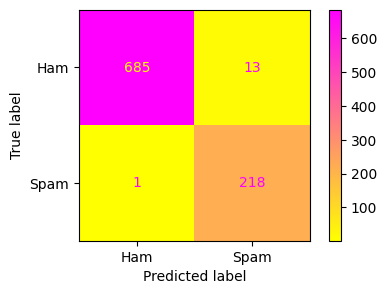

In [68]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_v,y_train)

prediction=lr.predict(X_val_v)


accuracy=accuracy_score(prediction,y_val)
print("Accuracy: ",accuracy)

target_names=['Ham','Spam']
print(classification_report(y_val,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_val, prediction.reshape(-1,1)) #normalize='true'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='spring_r')

<module 'matplotlib.pyplot' from 'C:\\Users\\shubh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

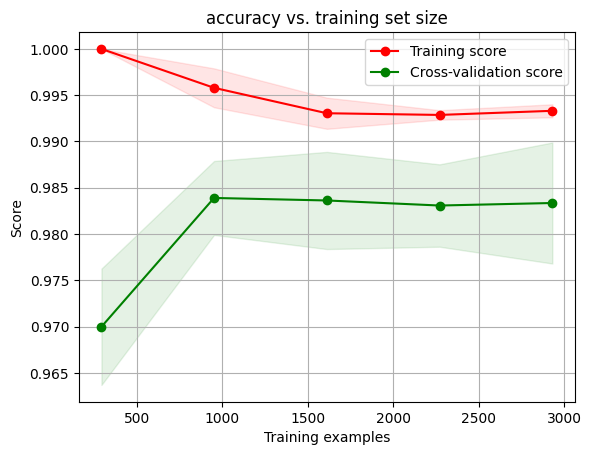

In [105]:
plot_learning_curve(lr, "accuracy vs. training set size", X_train_v, y_train, cv=5)

## Bernoulli Naive Bayes

Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is either present or absent.

0.9596510359869138
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       698
        Spam       0.99      0.84      0.91       219

    accuracy                           0.96       917
   macro avg       0.97      0.92      0.94       917
weighted avg       0.96      0.96      0.96       917



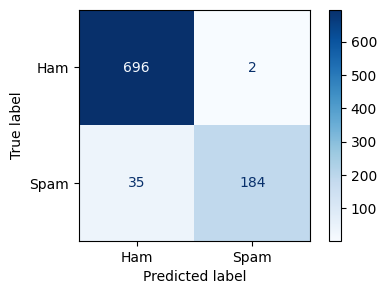

In [73]:
Bnb=BernoulliNB()
Bnb.fit(X_train_v.toarray(),y_train)

prediction=Bnb.predict(X_val_v.toarray())

accuracy=accuracy_score(prediction,y_val)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_val,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_val, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

<module 'matplotlib.pyplot' from 'C:\\Users\\shubh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

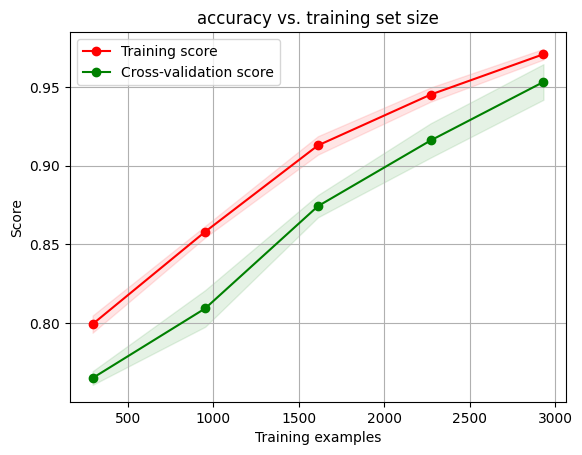

In [106]:
plot_learning_curve(Bnb, "accuracy vs. training set size", X_train_v, y_train, cv=5)

## Random Forest

0.960741548527808
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       698
        Spam       1.00      0.84      0.91       219

    accuracy                           0.96       917
   macro avg       0.98      0.92      0.94       917
weighted avg       0.96      0.96      0.96       917



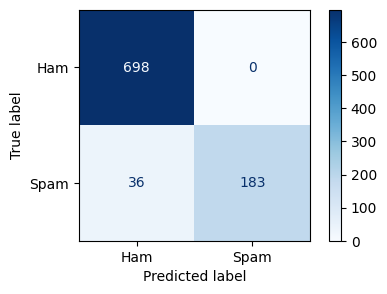

In [77]:
rf=RandomForestClassifier(n_estimators=1000,criterion='log_loss',max_features='log2',class_weight='balanced')
rf.fit(X_train_v,y_train)

prediction=rf.predict(X_val_v)

accuracy=accuracy_score(prediction,y_val)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_val,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_val, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

<module 'matplotlib.pyplot' from 'C:\\Users\\shubh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

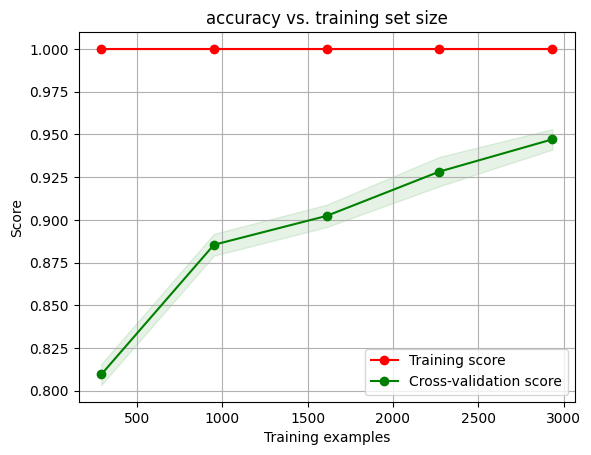

In [107]:
plot_learning_curve(rf, "accuracy vs. training set size", X_train_v, y_train, cv=5)

## Support Vector Machine

0.9912758996728462
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       698
        Spam       0.98      0.98      0.98       219

    accuracy                           0.99       917
   macro avg       0.99      0.99      0.99       917
weighted avg       0.99      0.99      0.99       917



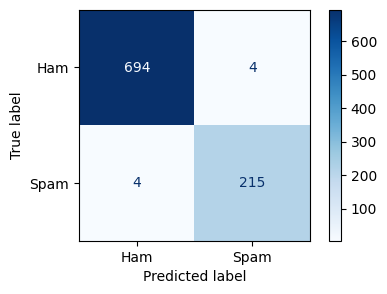

In [87]:
svc=SVC(kernel='sigmoid', class_weight='balanced')
svc.fit(X_train_v,y_train)
prediction=svc.predict(X_val_v)

accuracy=accuracy_score(prediction,y_val)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_val,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_val, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

In [95]:
import numpy as np
from sklearn.model_selection import learning_curve

In [96]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\shubh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

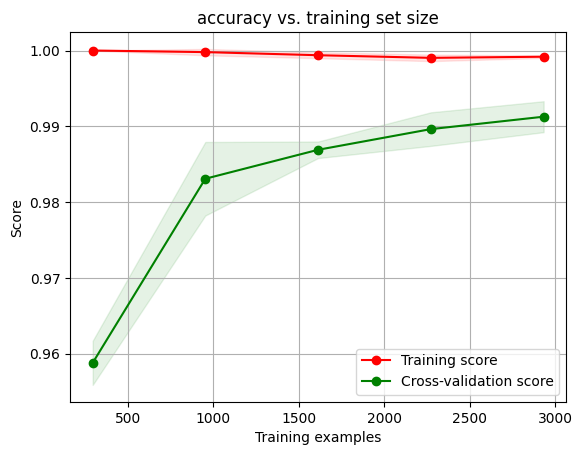

In [97]:
plot_learning_curve(svc, "accuracy vs. training set size", X_train_v, y_train, cv=5)

# Hyper-parameter tuning

## SVC

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   5.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.789 total time=   4.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.802 total time=   4.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   4.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.802 total time=   4.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   3.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   4.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   4.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   4.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   4.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.761 total time=   3.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

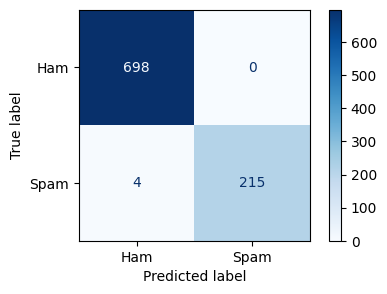

In [83]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_v, y_train) 

0.9956379498364231
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       698
        Spam       1.00      0.98      0.99       219

    accuracy                           1.00       917
   macro avg       1.00      0.99      0.99       917
weighted avg       1.00      1.00      1.00       917



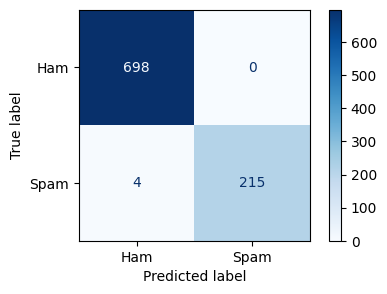

In [84]:
prediction=grid.predict(X_val_v)
accuracy=accuracy_score(prediction,y_val)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_val,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_val, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

<module 'matplotlib.pyplot' from 'C:\\Users\\shubh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

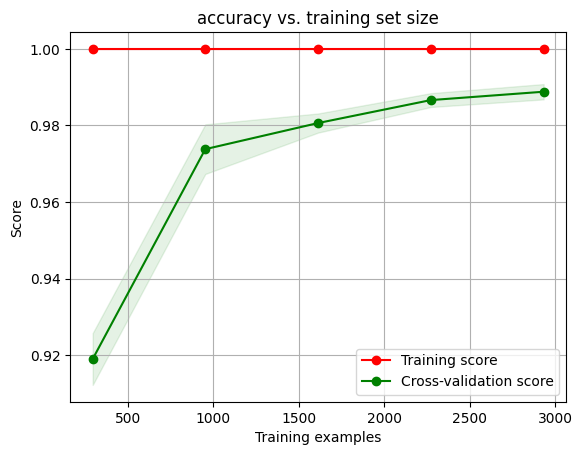

In [99]:
plot_learning_curve(grid.best_estimator_, "accuracy vs. training set size", X_train_v, y_train, cv=5)

# Scoring on test data

## Logistic Regression

0.9886561954624782
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       872
        Spam       0.96      1.00      0.98       274

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



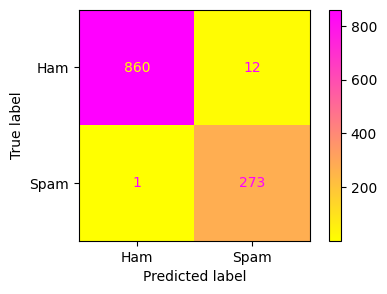

In [69]:
#from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_v,y_train)

prediction=lr.predict(X_test_v)

#from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1)) #normalize='true'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='spring_r')

## Random Forest

0.9572425828970331
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       872
        Spam       1.00      0.82      0.90       274

    accuracy                           0.96      1146
   macro avg       0.97      0.91      0.94      1146
weighted avg       0.96      0.96      0.96      1146



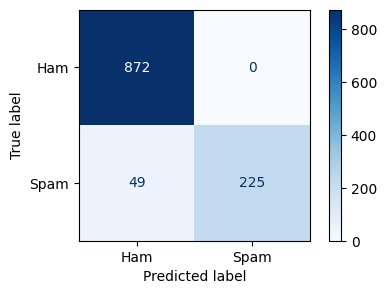

In [76]:
rf=RandomForestClassifier(n_estimators=1000,criterion='log_loss',max_features='log2',class_weight='balanced')
rf.fit(X_train_v,y_train)

prediction=rf.predict(X_test_v)

accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

## Support Vector Machine

0.993891797556719
              precision    recall  f1-score   support

         Ham       0.99      1.00      1.00       872
        Spam       0.99      0.98      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



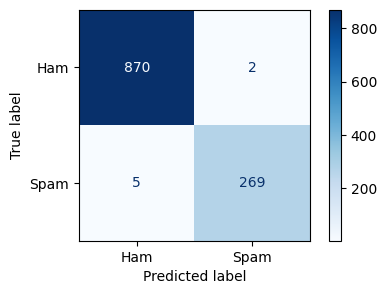

In [81]:
svc=SVC(kernel='sigmoid', class_weight='balanced')
svc.fit(X_train_v,y_train)
prediction=svc.predict(X_test_v)

accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')

After hyper-parameter tuning

0.9912739965095986
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       872
        Spam       1.00      0.97      0.98       274

    accuracy                           0.99      1146
   macro avg       0.99      0.98      0.99      1146
weighted avg       0.99      0.99      0.99      1146



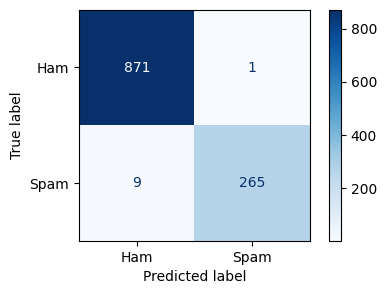

In [86]:
prediction=grid.predict(X_test_v)
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

target_names=['Ham','Spam']
print(classification_report(y_test,prediction.reshape(-1,1),target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,3))
disp.plot(ax=ax,cmap='Blues')